In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


# Import Plotting Libraries:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Import Models Libraries:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, make_scorer

# Reading Data:

In [4]:
train_df = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv')

In [5]:
X = train_df.drop(columns=['ID','y'])
X_k = train_df.drop(columns=['ID','y'])
y = train_df.y

# Unsupervised Learning:

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Dendrogram:

In [7]:
Z = linkage(X, method='ward', metric='euclidean')

In [8]:
Z.shape

(10833, 4)

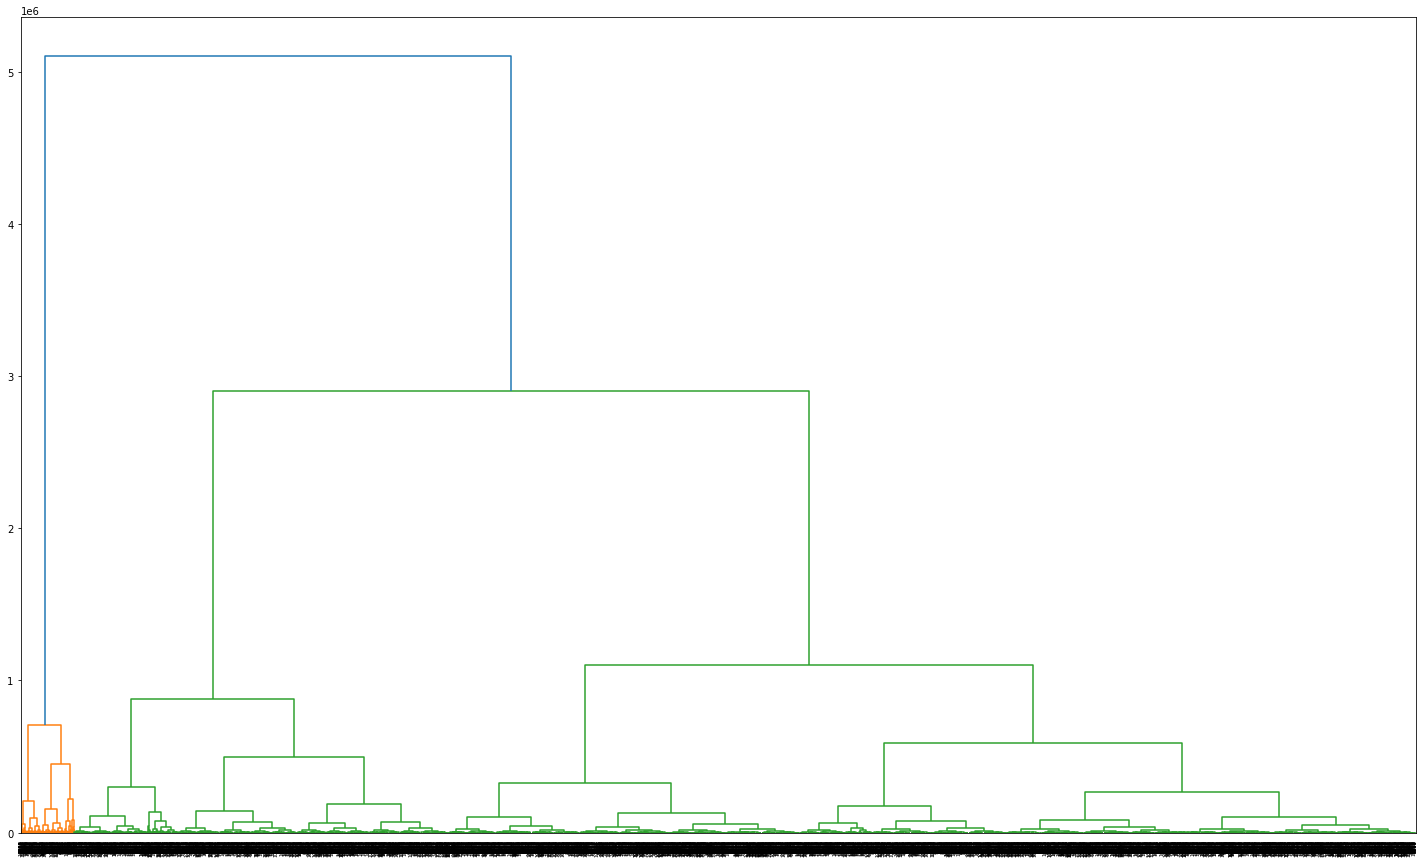

In [9]:
fig = plt.figure(figsize=(25, 15))
dn = dendrogram(Z)
plt.show()

# KMeans:

For n_clusters=2, The Silhouette Coefficient is 0.8441139190771864
For n_clusters=3, The Silhouette Coefficient is 0.6660176180516857
For n_clusters=4, The Silhouette Coefficient is 0.571584822109106
For n_clusters=5, The Silhouette Coefficient is 0.5435164032348859
For n_clusters=6, The Silhouette Coefficient is 0.5368436912336962
For n_clusters=7, The Silhouette Coefficient is 0.5333887230958083
For n_clusters=8, The Silhouette Coefficient is 0.5394309988687793
For n_clusters=9, The Silhouette Coefficient is 0.5394721814754594
For n_clusters=10, The Silhouette Coefficient is 0.5306751722656007
For n_clusters=11, The Silhouette Coefficient is 0.5262950801409579
For n_clusters=12, The Silhouette Coefficient is 0.5277424795185406
For n_clusters=13, The Silhouette Coefficient is 0.5261904186585977
For n_clusters=14, The Silhouette Coefficient is 0.5255418370515453


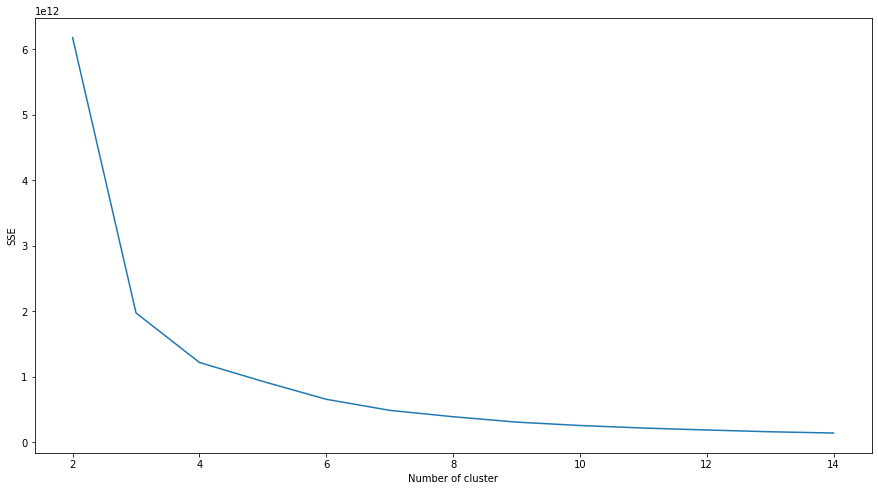

In [10]:
sse = {}

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_k)
    X_k["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    sil_coeff = silhouette_score(X_k, X_k["clusters"], metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
    
fig = plt.figure(figsize=(15, 8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=7, max_iter=1000).fit(X_k)
X_k["clusters"] = kmeans.labels_

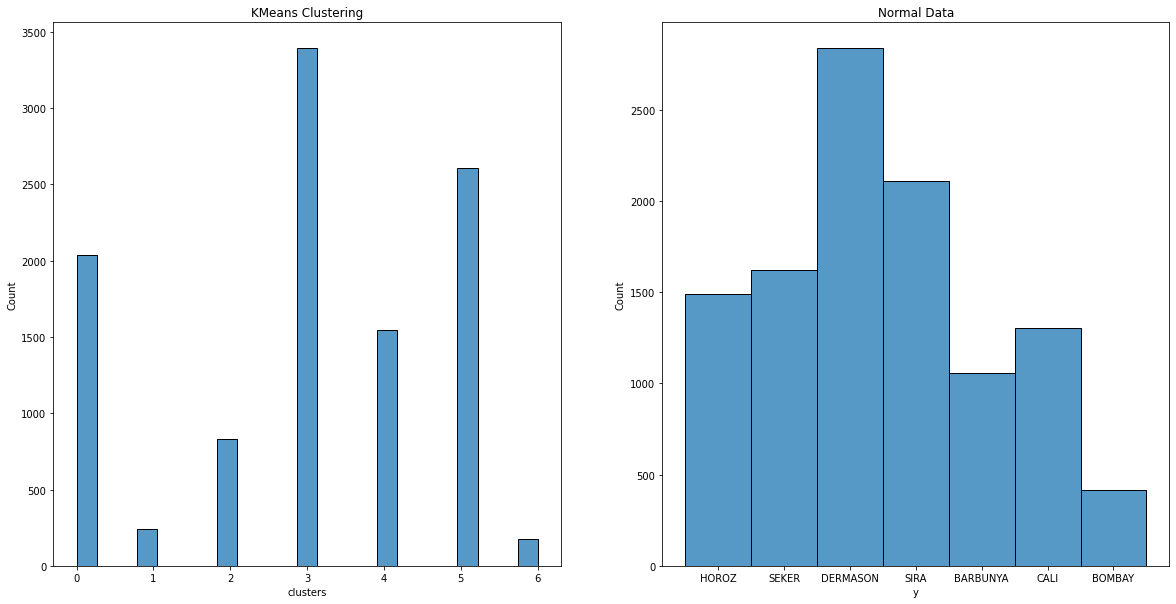

In [12]:
fig, axs = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
sns.histplot(ax=axs[0], data=X_k, x='clusters')
axs[0].set_title('KMeans Clustering')
sns.histplot(ax=axs[1], data=train_df, x='y')
axs[1].set_title('Normal Data')
plt.show()

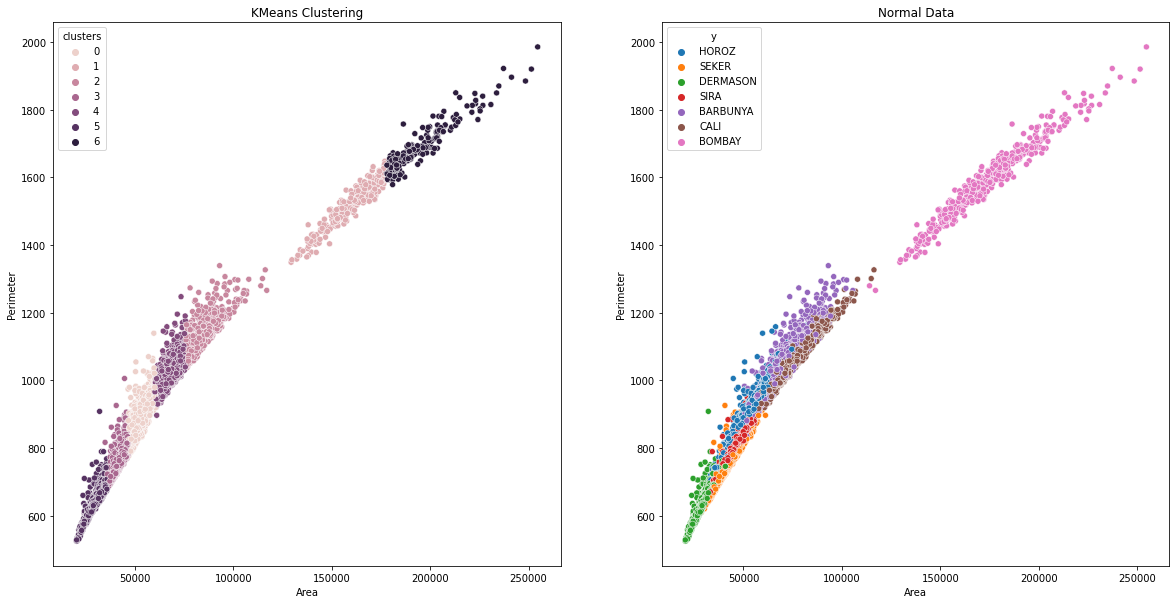

In [13]:
fig, axs = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
sns.scatterplot(ax=axs[0], data=X_k, x='Area', y='Perimeter', hue='clusters')
axs[0].set_title('KMeans Clustering')
sns.scatterplot(ax=axs[1], data=train_df, x='Area', y='Perimeter', hue='y')
axs[1].set_title('Normal Data')
plt.show()

# Agglomerative Clustering:

In [14]:
clustering = AgglomerativeClustering(n_clusters=7, linkage='ward', affinity='euclidean').fit(X)
X_k["clusters"] = clustering.labels_

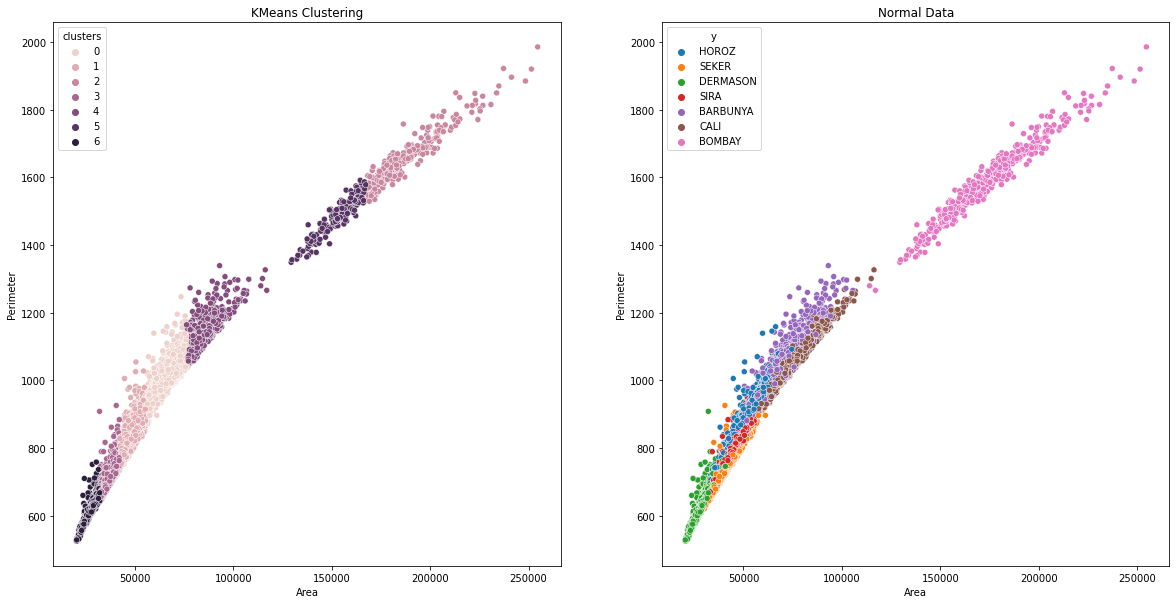

In [15]:
fig, axs = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
sns.scatterplot(ax=axs[0], data=X_k, x='Area', y='Perimeter', hue='clusters')
axs[0].set_title('KMeans Clustering')
sns.scatterplot(ax=axs[1], data=train_df, x='Area', y='Perimeter', hue='y')
axs[1].set_title('Normal Data')
plt.show()

# Data Processing:

In [16]:
train_features, val_features, train_labels, val_labels = train_test_split(X,
                                                                          y,
                                                                          test_size = 0.3,
                                                                          stratify = y,
                                                                          random_state = 1)

In [17]:
le = LabelEncoder()
le.fit(train_labels)

LabelEncoder()

In [18]:
train_labels = le.transform(train_labels)
val_labels = le.transform(val_labels)

# Plot Confusion Matrix:

In [19]:
def plot_confusion_matrix(clf, true_values, predicted_values):
    plt.figure(figsize = (8, 7))
    sns.heatmap(confusion_matrix(true_values, predicted_values),
                annot = True,
                fmt = ".0f",
                cmap = "coolwarm",
                linewidths = 2, 
                linecolor = "white",
                xticklabels = le.inverse_transform(clf.classes_),
                yticklabels = le.inverse_transform(clf.classes_))
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Confusion matrix on the testing data")
    plt.show()

# Models Training:

MLP Classifier
Training Accuracy: 0.304
Validation Accuracy: 0.298


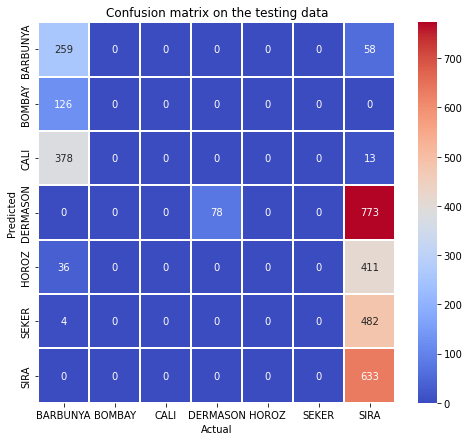

****************************************************************
SVC
Training Accuracy: 1.000
Validation Accuracy: 0.262


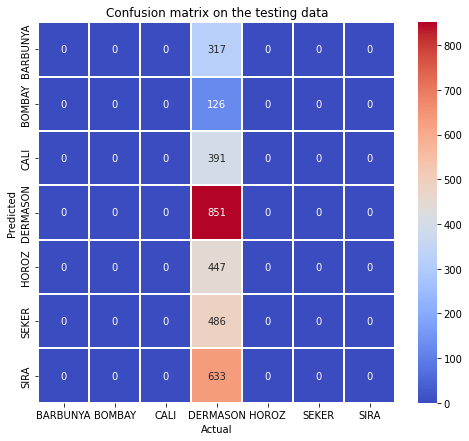

****************************************************************
K Nearest Neighbours
Training Accuracy: 0.690
Validation Accuracy: 0.670


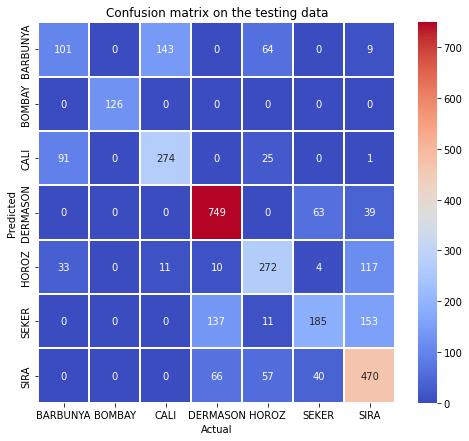

****************************************************************
Classification Tree
Training Accuracy: 0.828
Validation Accuracy: 0.824


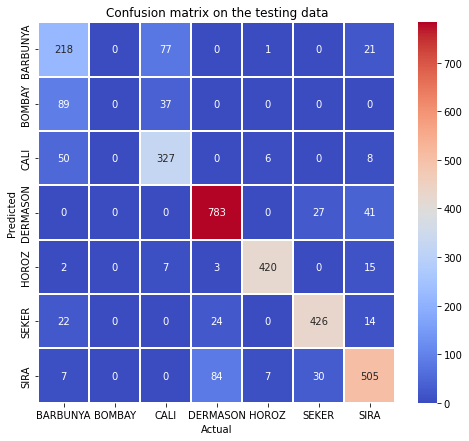

****************************************************************
Naive Bayes Classifier
Training Accuracy: 0.758
Validation Accuracy: 0.770


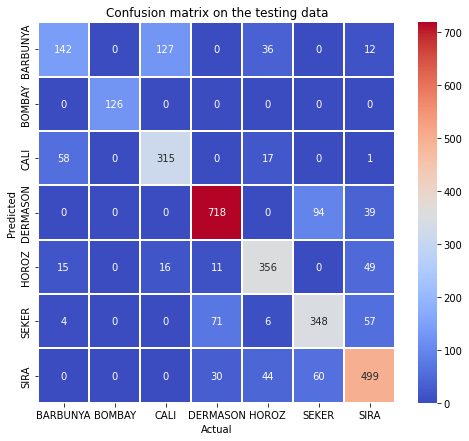

****************************************************************
Voting Classifier:
Training Accuracy: 0.852
Validation Classifier: 0.747


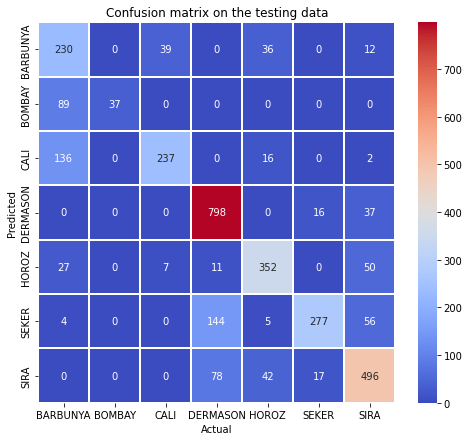

In [20]:
# Set seed for reproducibility
SEED=1

# Instantiate mlp
mlp = MLPClassifier(random_state=1, max_iter=300)

# Instantiate svm
svc = SVC(gamma='auto')

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Instantiate Naive_Bayes
nb = GaussianNB()

# Define the list classifiers
classifiers = [('MLP Classifier', mlp), ('SVC', svc),
               ('K Nearest Neighbours', knn), ('Classification Tree', dt), ('Naive Bayes Classifier', nb)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(train_features, train_labels)    
    
    # Calculate Training accuracy
    accuracy = accuracy_score(train_labels, clf.predict(train_features))
    
    # Evaluate clf's accuracy on the test set
    print('{:s}\nTraining Accuracy: {:.3f}'.format(clf_name, accuracy))
    
    # Predict y_pred
    y_pred = clf.predict(val_features)
    
    # Calculate accuracy
    accuracy = accuracy_score(val_labels, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('Validation Accuracy: {:.3f}'.format(accuracy))
    
    #Plot Confusion Matrix
    plot_confusion_matrix(clf, val_labels, y_pred)
    
    print('****************************************************************')

# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(train_features, train_labels) 

# Calculate Training accuracy
accuracy = accuracy_score(train_labels, vc.predict(train_features))
print('Voting Classifier:\nTraining Accuracy: {:.3f}'.format(accuracy))

# Evaluate the test set predictions
y_pred = vc.predict(val_features)

# Calculate accuracy score
accuracy = accuracy_score(val_labels, y_pred)
print('Validation Classifier: {:.3f}'.format(accuracy))

#Plot Confusion Matrix
plot_confusion_matrix(vc, val_labels, y_pred)